In [91]:
#Analyse Bank Customer data using Visual Analytics

In [92]:
#Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [3]:
#load the dataset
df_bank = pd.read_csv("C:\\DataSets\\Visual_BankCustomers_Data.csv")
df_bank.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [4]:
#describe the dataset
df_bank.describe()

,Customer ID,Age,Balance
count,4.014000e+03,4014.000000,4014.000000
mean,1.696831e+08,38.611111,39766.448274
std,8.865374e+07,9.819121,29859.489192
min,1.000000e+08,15.000000,11.520000
25%,1.000020e+08,31.000000,16115.367500
50%,1.000038e+08,37.000000,33567.330000
75%,2.000031e+08,45.000000,57533.930000
max,4.000038e+08,64.000000,183467.700000


In [5]:
#check for null value
pd.isnull(df_bank).any()

Customer ID           False
Name                  False
Surname               False
Gender                False
Age                   False
Region                False
Job Classification    False
Date Joined           False
Balance               False
dtype: bool

In [6]:
#Check No of customers by Region

In [7]:
df_bank['Region'].value_counts()

England             2159
Scotland            1124
Wales                520
Northern Ireland     211
Name: Region, dtype: int64

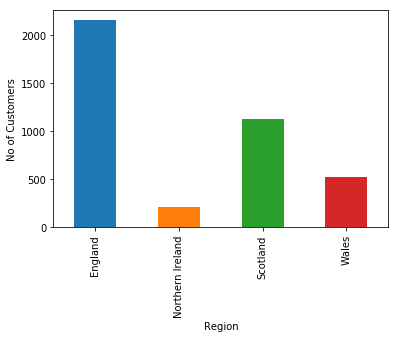

In [8]:
df_bank_grpby_region = df_bank.groupby(['Region'])['Customer ID'].count()
plt.xlabel('Region')
plt.ylabel('No of Customers')
df_bank_grpby_region.plot.bar()
plt.show()

In [100]:
#Check No of customers by Gender

In [10]:
df_bank['Gender'].value_counts()

Male      2165
Female    1849
Name: Gender, dtype: int64

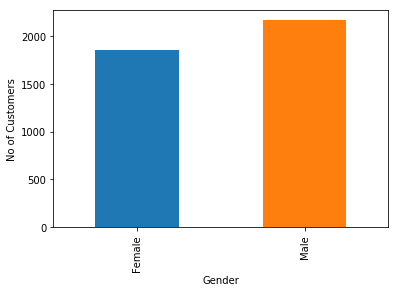

In [9]:
#Check No of customers by Gender
df_bank_grpby_gender = df_bank.groupby(['Gender'])['Customer ID'].count()
plt.xlabel('Gender')
plt.ylabel('No of Customers')
df_bank_grpby_gender.plot.bar()
plt.show()

In [103]:
#Check No of customers by Job Classification

In [104]:
df_bank['Job Classification'].value_counts()

White Collar    1955
Blue Collar     1049
Other           1010
Name: Job Classification, dtype: int64

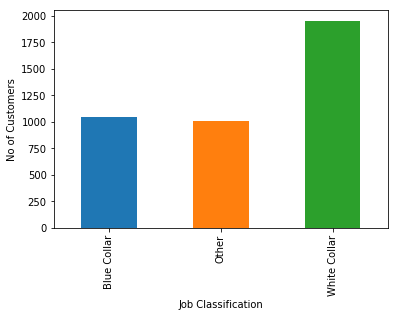

In [11]:
df_bank_grpby_job_classification = df_bank.groupby(['Job Classification'])['Customer ID'].count()
plt.xlabel('Job Classification')
plt.ylabel('No of Customers')
df_bank_grpby_job_classification.plot.bar()
plt.show()

In [107]:
#Check distribution of balance

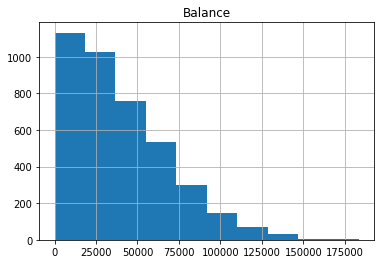

In [108]:
df_bank.hist(column='Balance')
plt.show();

In [109]:
%matplotlib inline

In [110]:
#sns.pairplot(df_bank, kind="reg")

In [111]:
#https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/

In [112]:
#check the distribution of Age

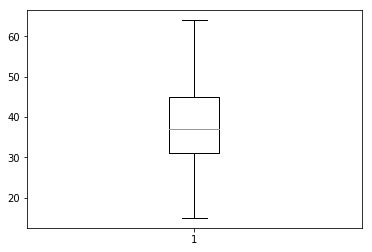

In [12]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.boxplot(df_bank['Age'])
plt.show();

(array([  101.,   478.,  1103.,  1024.,   678.,   421.,   209.]),
 array([ 15.,  22.,  29.,  36.,  43.,  50.,  57.,  64.]),
 <a list of 7 Patch objects>)

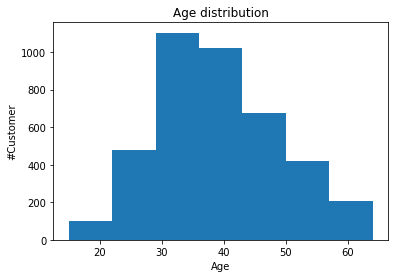

In [13]:
fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df_bank['Age'],bins = 7) # Here you can play with number of bins
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Customer')
plt.show()

In [20]:
#Gender wise Balance

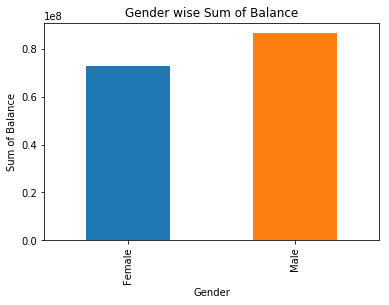

In [21]:
var1 = df_bank.groupby('Gender').Balance.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Sum of Balance')
ax1.set_title("Gender wise Sum of Balance")
var1.plot(kind='bar')

In [22]:
#Region wise balance

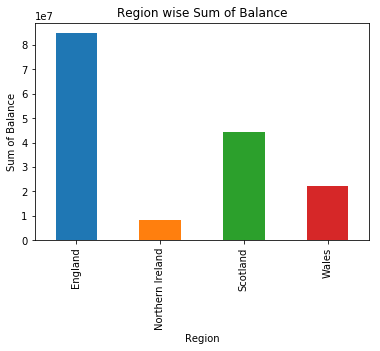

In [23]:
var2 = df_bank.groupby('Region').Balance.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Region')
ax1.set_ylabel('Sum of Balance')
ax1.set_title("Region wise Sum of Balance")
var2.plot(kind='bar')

In [24]:
#Job Classification wise balance

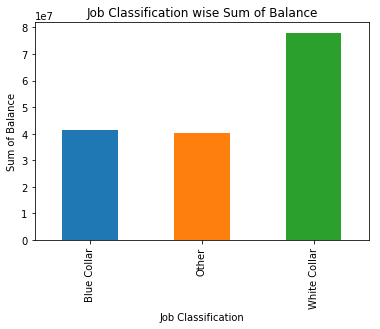

In [25]:
var3 = df_bank.groupby('Job Classification').Balance.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Job Classification')
ax1.set_ylabel('Sum of Balance')
ax1.set_title("Job Classification wise Sum of Balance")
var3.plot(kind='bar')

In [ ]:
#Calculate duration of the customers in the bank

In [56]:
df_bank1 = df_bank.copy()

In [57]:
df_bank1.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [58]:
df_bank1.dtypes

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
dtype: object

In [59]:
df_bank1['Date Joined'] = pd.to_datetime(df_bank1['Date Joined'])
df_bank1.dtypes
df_bank1.head()

Customer ID                    int64
Name                          object
Surname                       object
Gender                        object
Age                            int64
Region                        object
Job Classification            object
Date Joined           datetime64[ns]
Balance                      float64
dtype: object

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79


In [64]:
from datetime import datetime
from datetime import date

In [113]:
#taken this date as all the customers have joined in 2015 only
date1 = date(2015, 12, 31)

In [114]:
#df_bank1['days_since'] = datetime.today().date() - df_bank1['Date Joined']
df_bank1['days_since'] = date1 - df_bank1['Date Joined']

In [115]:
df_bank1.head()
df_bank1.dtypes

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,days_since,days_since_mod
0,100000001,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,360 days,360
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73,359 days,359
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,358 days,358
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52,357 days,357
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79,356 days,356


Customer ID                     int64
Name                           object
Surname                        object
Gender                         object
Age                             int64
Region                         object
Job Classification             object
Date Joined            datetime64[ns]
Balance                       float64
days_since            timedelta64[ns]
days_since_mod                  int32
dtype: object

In [116]:
df_bank1['days_since_mod'] = (df_bank1['days_since'] / np.timedelta64(1, 'D')).astype(int)
df_bank1.head()
df_bank1.dtypes

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,days_since,days_since_mod
0,100000001,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,360 days,360
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73,359 days,359
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,358 days,358
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52,357 days,357
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79,356 days,356


Customer ID                     int64
Name                           object
Surname                        object
Gender                         object
Age                             int64
Region                         object
Job Classification             object
Date Joined            datetime64[ns]
Balance                       float64
days_since            timedelta64[ns]
days_since_mod                  int32
dtype: object

In [118]:
#plot the days_since against balance to see the distribution

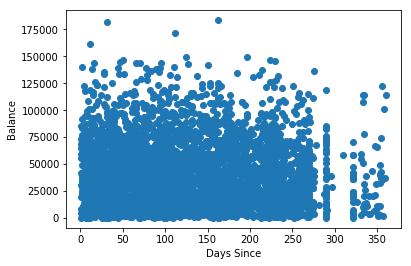

In [119]:
fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)
ax.set_xlabel('Days Since')
ax.set_ylabel('Balance')
ax.scatter(df_bank1['days_since_mod'],df_bank1['Balance']) #You can also add more variables here to represent color and size.
plt.show();

In [120]:
#drop unrelated columns

In [121]:
#df_bank2 = df_bank1.copy()

In [122]:
#df_bank2 = df_bank2.drop(['Customer ID','Name','Surname', 'Date Joined', 'days_since'], axis = 1)

In [123]:
#df_bank2.head()

In [124]:
#sns.pairplot(df_bank2, kind = 'reg')